In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd 
import numpy as np
import seaborn as sns

Here, we load the serialized DataFrame saved in step 1.

In [2]:
raw_input = pd.read_pickle('input.pkl')

In [3]:
raw_input.head()

,article_id,grade,level,text,topic_id,topic_text,unit
0,1,90,6,"After some time, the affection between them is...",41,Writing a movie plot,1
1,2,90,6,An e-ticket is a provement that you bought the...,42,Filling in an arrival card,2
2,3,86,6,From:xxx@1234.com To:Herman xxx@1234.com Date:...,43,Creating an office dress code,3
3,4,87,1,"Hi Anna ,How are you . My name's Jayla . My te...",1,Introducing yourself by email,1
4,5,95,1,"Dear Ms Thomas, There are thirty pens and fift...",2,Taking inventory in the office,2


In [4]:
raw_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180309 entries, 0 to 1180308
Data columns (total 7 columns):
article_id    1180309 non-null int64
grade         1180309 non-null int64
level         1180309 non-null int64
text          1180309 non-null object
topic_id      1180309 non-null int64
topic_text    1180309 non-null object
unit          1180309 non-null int64
dtypes: int64(5), object(2)
memory usage: 63.0+ MB


# Check for Class Imbalance

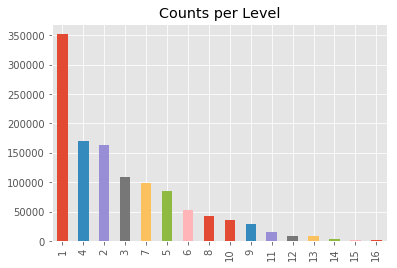

In [6]:
level_counts = raw_input.level.value_counts()
ax = level_counts.plot(kind='bar', title='Counts per Level')

# Relationship between topic_id and level

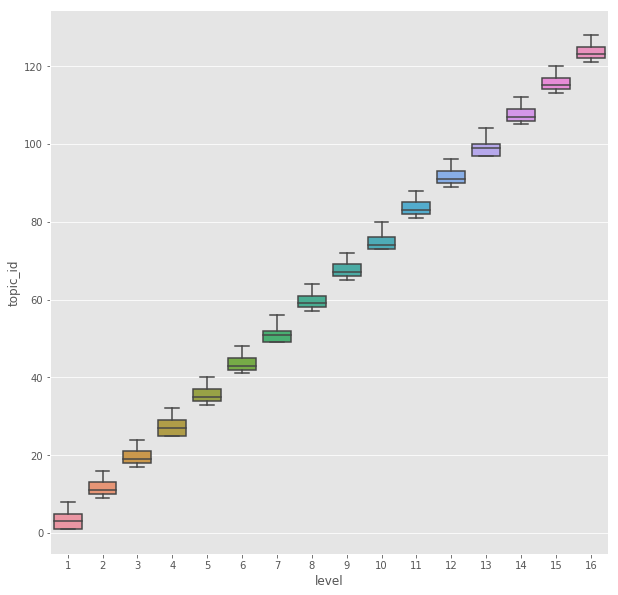

In [11]:
ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.boxplot(x='level', y='topic_id', data=raw_input)

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold

model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1000)
cv = KFold(n_splits=10, shuffle=True, random_state=1234)

X = raw_input.loc[:, ['topic_id']].values
y = raw_input.loc[:, 'level'].values
predictions = cross_val_predict(model, X=X, y=y, cv=cv, verbose=1)

# Display Classification Results

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(predictions, y)
print(report)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

level_values = raw_input.loc[:, 'level'].unique()
level_values = level_values.sort()
cm = confusion_matrix(y_true=y, y_pred=predictions, labels=level_values)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.heatmap(cm, annot=True, ax=ax)